In [1]:
# https://github.com/idealo/imagededup
from imagededup.methods import PHash
phasher = PHash()

In [3]:
encodings = phasher.encode_images(image_dir='Folder')

2021-12-05 14:44:20,664: INFO Start: Calculating hashes...
100%|██████████| 880/880 [00:04<00:00, 183.10it/s]
2021-12-05 14:44:25,661: INFO End: Calculating hashes!


In [4]:
duplicates = phasher.find_duplicates(encoding_map=encodings)

2021-12-05 14:44:32,773: INFO Start: Evaluating hamming distances for getting duplicates
2021-12-05 14:44:32,774: INFO Start: Retrieving duplicates using Cython Brute force algorithm
100%|██████████| 880/880 [00:00<00:00, 168300.01it/s]
2021-12-05 14:44:32,951: INFO End: Retrieving duplicates using Cython Brute force algorithm
2021-12-05 14:44:32,952: INFO End: Evaluating hamming distances for getting duplicates


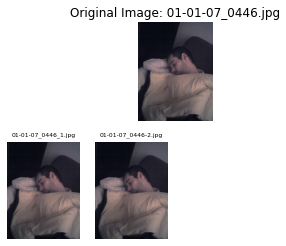

In [6]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir='Soirees',
                duplicate_map=duplicates,
                filename='01-01-07_0446.jpg')

In [8]:
import os
folder = 'Folder'
for name in duplicates.keys():
    if os.path.exists(os.path.join(folder, name)):
        for dupname in duplicates[name]:
            if os.path.exists(os.path.join(folder, dupname)):
                os.remove(os.path.join(folder, dupname))